# Data Dictionary
    Variable	Definition	                                        Key
    survival	Survival	                                        0 = No, 1 = Yes
    pclass	    Ticket class                                  	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	        Sex	
    Age	        Age in years	
    sibsp	    # of siblings / spouses aboard the Titanic	
    parch	    # of parents / children aboard the Titanic	
    ticket	    Ticket number	
    fare	    Passenger fare	
    cabin	    Cabin number	
    embarked	Port of Embarkation	                                C = Cherbourg, Q = Queenstown, S = Southampton
    

   ## Variable Notes
    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister

    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...

    Parent = mother, father

    Child = daughter, son, stepdaughter, stepson

    Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import Data from file location

In [2]:
os.chdir(r"C:\Users\Lokesh\Programing - Lokesh\DataScience\Udemey\DATA") # change directory to file path

In [3]:
df = pd.read_csv("titanic - train.csv")

## Basic Analysis

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


     * Found 891 records with 12 column values
     * some missing values in column "Cabin","Age","Embarked"

# Data analysis using Datatype

In [6]:
df.select_dtypes(include='float64')

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


    * "Fare" value and "Age" should be scaledown
    *  Age 19.87% data is Nan

In [7]:
df.select_dtypes(include='int64')

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [8]:
df.groupby(by='Parch').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col,": ",df[col].nunique(),"Unique values")
    print("**************************************************************************************")
    print(df[col].value_counts())
    print("**************************************************************************************")

Name :  891 Unique values
**************************************************************************************
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
**************************************************************************************
Sex :  2 Unique values
**************************************************************************************
male      577
female    314
Name: Sex, dtype: int64
**************************************************************************************
Ticket 

In [10]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Dtype,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
Unique,891,2,3,891,2,88,7,7,681,248,147,3
Missing_%,0.0,0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22


Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64


<AxesSubplot:>

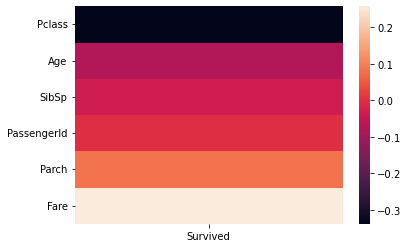

In [11]:
#finding corelation b/w "survived" with others

#Fare is strong corlation with survive

print(df.corr()["Survived"].sort_values())

sns.heatmap(pd.DataFrame(df.corr()["Survived"].sort_values())[:-1])

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
df.isnull().sum()[df.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# OBSERVATIONS:

    * Found "PassengerId", "Name" columns are Unique values. hence those colums need to be drop.
    * Totally we have 891 recoards with diff 12 column values.
    * Found dtypes : float64(2), int64(5), object(5).
    * In dtype - object(5) found "Sex, "Embarked" are catagorial values.
    * More then 75% of "Cabin" are NaN.
    * We seen the strong co-relatoin between "Survived" & "Fare"
    * for missing Age we can find based on "Parch"

In [14]:
df = df.drop(["PassengerId", "Name"], axis=1) #dropped due to unique values

In [15]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,object,float64,object,object
Unique,2,3,2,88,7,7,681,248,147,3
Missing_%,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22


# Feature Engineering

# Missing-Data

In [16]:
#based on parch person age and will change, hence 19.87% of missing values filled with based on Parch

df.groupby(by="Parch").mean()['Age']


Parch
0    32.178503
1    24.422000
2    17.216912
3    33.200000
4    44.500000
5    39.200000
6    43.000000
Name: Age, dtype: float64

In [17]:
df['Age'] = df['Age'].fillna(df.groupby('Parch')['Age'].transform('mean'))

  Age convert flot to int for better indication

In [18]:
df["Age"] = df["Age"].apply(lambda x:round(x, 0))

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,17.0,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [20]:
df.groupby(by='Embarked').mean()[['Fare','Pclass']]

,Fare,Pclass
Embarked,,
C,59.954144,1.886905
Q,13.276030,2.909091
S,27.079812,2.350932


    'Embarked' have strong connection b/w 'Fare','Pclass'

    but we can fin the clear indication based on Ticket Number

In [21]:
df[df["Fare"].between(79,83)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
34,0,1,male,28.0,1,0,PC 17604,82.1708,NaN,C
61,1,1,female,38.0,0,0,113572,80.0000,B28,NaN
139,0,1,male,24.0,0,0,PC 17593,79.2000,B86,C
256,1,1,female,32.0,0,0,PC 17585,79.2000,NaN,C
262,0,1,male,52.0,1,1,110413,79.6500,E67,S
375,1,1,female,32.0,1,0,PC 17604,82.1708,NaN,C
445,1,1,male,4.0,0,2,33638,81.8583,A34,S
558,1,1,female,39.0,1,1,110413,79.6500,E67,S
585,1,1,female,18.0,0,2,110413,79.6500,E68,S
587,1,1,male,60.0,1,1,13567,79.2000,B41,C


In [22]:
df['Embarked'].fillna("S",inplace=True)

    based on ticket number we can fill the Ebbarked as "s" value

In [23]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,object,float64,object,object
Unique,2,3,2,71,7,7,681,248,147,3
Missing_%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.1,0.0


finally figured out all missing data except cabin column

# Outliers

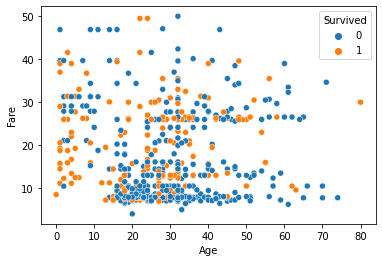

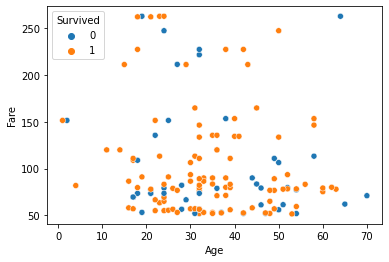

In [24]:
sns.scatterplot(data=df[df["Fare"].between(1,50)],y='Fare',x='Age',hue='Survived');
fig = plt.subplots()
sns.scatterplot(data=df[df["Fare"].between(51,500)],y='Fare',x='Age',hue='Survived');

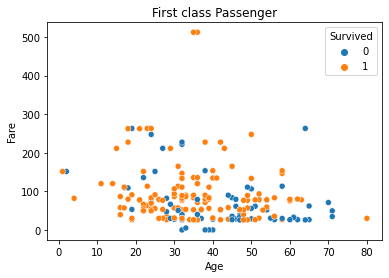

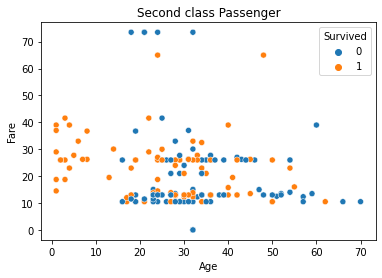

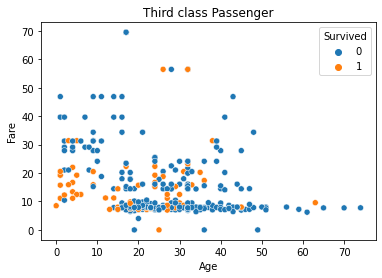

In [25]:
sns.scatterplot(data=df[df['Pclass']==1],y='Fare',x='Age',hue='Survived');
plt.title('First class Passenger')
fig = plt.subplots()
sns.scatterplot(data=df[df['Pclass']==2],y='Fare',x='Age',hue='Survived');
plt.title('Second class Passenger')
fig = plt.subplots()
sns.scatterplot(data=df[df['Pclass']==3],y='Fare',x='Age',hue='Survived');
plt.title('Third class Passenger');

    We can see the clear indication of class's and suvived pasangers. maximum suvival % is in 1st class

# EDA

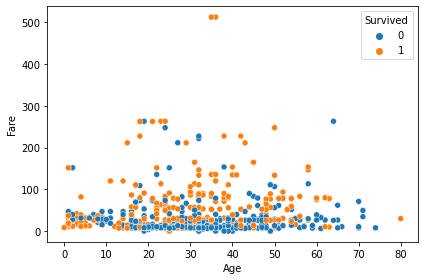

In [26]:
#plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x="Age",y="Fare",hue="Survived")
#plt.xticks(rotation = 90)
plt.tight_layout();

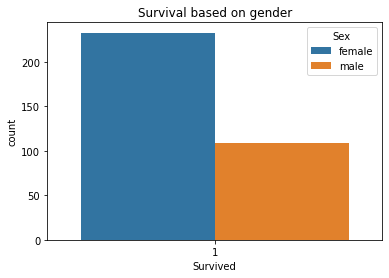

In [27]:
plt.title('Survival based on gender')
sns.countplot(data=df[df['Survived']==1],x='Survived',hue='Sex');

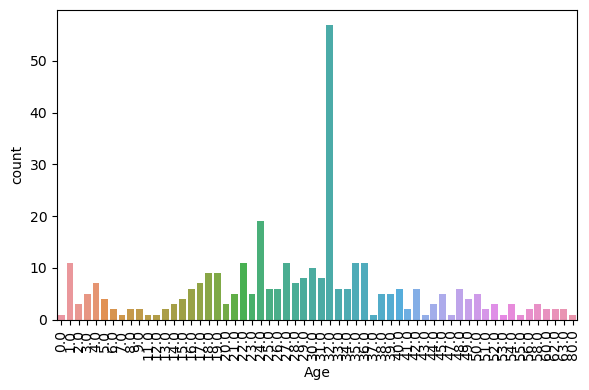

In [28]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=df[df['Survived']==1],x='Age')
plt.xticks(rotation = 90)
plt.tight_layout();

    At the age batween 32 maximum survival % occured

In [29]:
#Dropping columns having more than 75% null values

df.drop(df.columns[round(100*df.isnull().sum()/len(df),2)>75], axis = 1, inplace = True)

In [30]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Dtype,int64,int64,object,float64,int64,int64,object,float64,object
Unique,2,3,2,71,7,7,681,248,3
Missing_%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,17.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [32]:
df['Ticket']=df['Ticket'].apply(lambda x: x.split())

In [33]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,"[A/5, 21171]",7.2500,S
1,1,1,female,38.0,1,0,"[PC, 17599]",71.2833,C
2,1,3,female,26.0,0,0,"[STON/O2., 3101282]",7.9250,S
3,1,1,female,35.0,1,0,[113803],53.1000,S
4,0,3,male,35.0,0,0,[373450],8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,[211536],13.0000,S
887,1,1,female,19.0,0,0,[112053],30.0000,S
888,0,3,female,17.0,1,2,"[W./C., 6607]",23.4500,S
889,1,1,male,26.0,0,0,[111369],30.0000,C


In [34]:
df['Ticket1'] = df['Ticket'].apply(lambda x: x[-1])

In [35]:
df['Ticket2'] = df['Ticket'].apply(lambda x: x[0])

In [36]:
df.select_dtypes(include='object')

,Sex,Ticket,Embarked,Ticket1,Ticket2
0,male,"[A/5, 21171]",S,21171,A/5
1,female,"[PC, 17599]",C,17599,PC
2,female,"[STON/O2., 3101282]",S,3101282,STON/O2.
3,female,[113803],S,113803,113803
4,male,[373450],S,373450,373450
...,...,...,...,...,...
886,male,[211536],S,211536,211536
887,female,[112053],S,112053,112053
888,female,"[W./C., 6607]",S,6607,W./C.
889,male,[111369],C,111369,111369


In [37]:
df['Ticket1'] = df['Ticket1'].apply(pd.to_numeric, errors='ignore')

In [38]:
df = df.drop('Ticket',axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket1,Ticket2
0,0,3,male,22.0,1,0,7.2500,S,21171,A/5
1,1,1,female,38.0,1,0,71.2833,C,17599,PC
2,1,3,female,26.0,0,0,7.9250,S,3101282,STON/O2.
3,1,1,female,35.0,1,0,53.1000,S,113803,113803
4,0,3,male,35.0,0,0,8.0500,S,373450,373450
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,211536,211536
887,1,1,female,19.0,0,0,30.0000,S,112053,112053
888,0,3,female,17.0,1,2,23.4500,S,6607,W./C.
889,1,1,male,26.0,0,0,30.0000,C,111369,111369


In [39]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket1,Ticket2
Dtype,int64,int64,object,float64,int64,int64,float64,object,object,object
Unique,2,3,2,71,7,7,248,3,679,557
Missing_%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extracting object dtype in column

In [40]:
count = {}
num = -1
for x in df['Ticket1']:
    num = num+1
    try:
        int(x)
    except:
        count[num] = x

In [41]:
df['Ticket1'].iloc[list(count.keys())]=0

E:\Users\Lokesh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
New_count = {}
num = -1
for x in df['Ticket2']:
    num = num+1
    try:
        int(x)
        New_count[num] = x
    except:
        pass

In [43]:
temp_list = list(New_count.keys())

In [44]:
df['Ticket2'].iloc[temp_list]='Normal'

In [45]:
df['Ticket1'] = df['Ticket1'].apply(pd.to_numeric, errors='ignore')

In [46]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket1,Ticket2
Dtype,int64,int64,object,float64,int64,int64,float64,object,int64,object
Unique,2,3,2,71,7,7,248,3,679,44
Missing_%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df['Sex'] = df['Sex'].replace({'male':0,'female':1})

In [48]:
df['Sex'] = df['Sex'].apply(pd.to_numeric, errors='ignore')

In [49]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket1,Ticket2
Dtype,int64,int64,int64,float64,int64,int64,float64,object,int64,object
Unique,2,3,2,71,7,7,248,3,679,44
Missing_%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df = pd.get_dummies(df)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket1,Embarked_C,Embarked_Q,...,Ticket2_SOTON/O.Q.,Ticket2_SOTON/O2,Ticket2_SOTON/OQ,Ticket2_STON/O,Ticket2_STON/O2.,Ticket2_SW/PP,Ticket2_W./C.,Ticket2_W.E.P.,Ticket2_W/C,Ticket2_WE/P
0,0,3,0,22.0,1,0,7.2500,21171,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,71.2833,17599,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,3101282,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,35.0,1,0,53.1000,113803,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,35.0,0,0,8.0500,373450,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,211536,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,1,19.0,0,0,30.0000,112053,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,3,1,17.0,1,2,23.4500,6607,0,0,...,0,0,0,0,0,0,1,0,0,0
889,1,1,0,26.0,0,0,30.0000,111369,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model Date preparation

In [51]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [52]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket1,Embarked_C,Embarked_Q,Embarked_S,...,Ticket2_SOTON/O.Q.,Ticket2_SOTON/O2,Ticket2_SOTON/OQ,Ticket2_STON/O,Ticket2_STON/O2.,Ticket2_SW/PP,Ticket2_W./C.,Ticket2_W.E.P.,Ticket2_W/C,Ticket2_WE/P
0,3,0,22.0,1,0,7.2500,21171,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,17599,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,3101282,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,113803,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,0,35.0,0,0,8.0500,373450,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Split the data for test

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101,stratify=y)

# Data Scalling

In [192]:
from sklearn.preprocessing import StandardScaler

# Import model required libraries

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from collections import Counter

# Model Developing

In [334]:
Pipe_NBC = [('scaler1',StandardScaler()),('NBC',GaussianNB())]
Pipe_RFC = [('scaler2',StandardScaler()),('RFC',RandomForestClassifier())]
Pipe_SVC = [('scaler3',StandardScaler()),('SVC',SVC())]
Pipe_DTC = [('scaler4',StandardScaler()),('DTC',DecisionTreeClassifier())]
Pipe_KNC = [('scaler5',StandardScaler()),('KNC',KNeighborsClassifier())]

In [341]:
pipe_list = [Pipe_NBC, Pipe_RFC, Pipe_SVC, Pipe_DTC, Pipe_KNC]
Pipe_num = ["GaussianNB", "RandomForestClassifier", "SVC", "DecisionTreeClassifier", "KNeighborsClassifier"]

In [425]:
y = enumerate(Pipe_num)
Pipe_name = dict(y)

In [426]:
#Put data in to Series and find the best accuracy

model_result = {}
for i,pipe in enumerate(pipe_list):
    model = Pipeline(pipe)
    model.fit(X_train,y_train)
    y_prid = model.predict(X_test)
    model_result[accuracy_score(y_test, y_prid)]=Pipe_name[i]
    
print("****************************************\n")    
print("Find the below listed model performance \n")
print("****************************************\n")
print(pd.Series(model_result).sort_index(),'\n')
print("****************************************\n")
print("Accuracy_score is :",list(pd.Series(model_result).sort_index())[-1])

****************************************

Find the below listed model performance 

****************************************

0.432836                GaussianNB
0.742537                       SVC
0.779851    RandomForestClassifier
0.783582    DecisionTreeClassifier
0.787313      KNeighborsClassifier
dtype: object 

****************************************

Accuracy_score is : KNeighborsClassifier


In [435]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier())]

In [437]:
pipe = Pipeline(operations)

In [438]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [439]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=10))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=10),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 10,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [440]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [441]:
len(k_values)

19

In [469]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.78957419, 0.79609032, 0.80575484, 0.80735484, 0.81541935,
       0.81054194, 0.82020645, 0.82023226, 0.82181935, 0.82185806,
       0.81703226, 0.80738065, 0.80419355, 0.80739355, 0.80256774,
       0.81221935, 0.80098065, 0.80256774, 0.80255484])

In [443]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

In [451]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

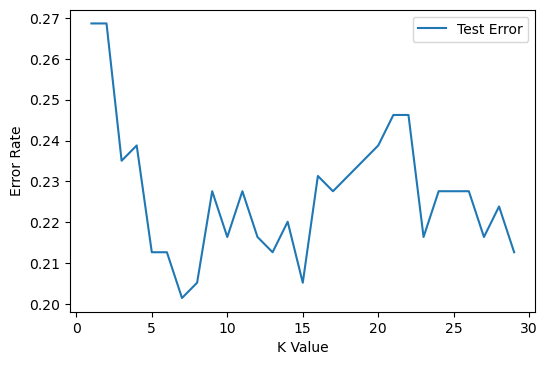

In [466]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

(1.0, 10.0)

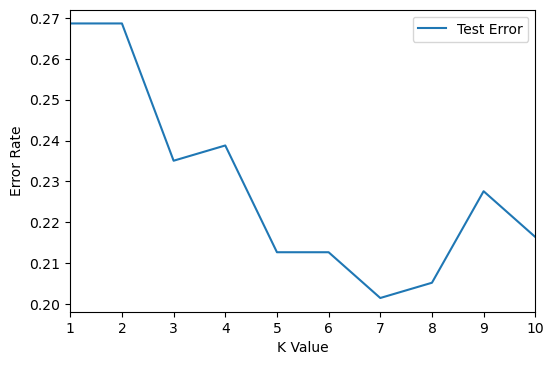

In [467]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xlim(1, 10)

In [460]:
scaler = StandardScaler()
knn10 = KNeighborsClassifier(n_neighbors=7)
operations = [('scaler',scaler),('knn10',knn10)]

In [461]:
pipe = Pipeline(operations)
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn10', KNeighborsClassifier(n_neighbors=7))])

In [462]:
pipe_pred = pipe.predict(X_test)

In [463]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       165
           1       0.81      0.62      0.70       103

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268

